In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

boston_dataset = load_boston()

In [2]:
print(boston_dataset.keys())
print('****************************************************************************')
print(boston_dataset.DESCR)

dict_keys(['filename', 'feature_names', 'DESCR', 'target', 'data'])
****************************************************************************
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centr

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Let's verify the absence of null or missing values in the training data

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Let's analyze the (Pearson) correlation between the features. This is an important operation when we deal with a great number of features, in fact this dataset has 13 features which cannot be drawn. This problem is called curse of dimensionality. Then we evaluate the correlation in order to reduce manually the features by extracting 2 or 3 features with the higher correlation value

In [6]:
boston.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0.5, 1.0, 'Boston Correlation')

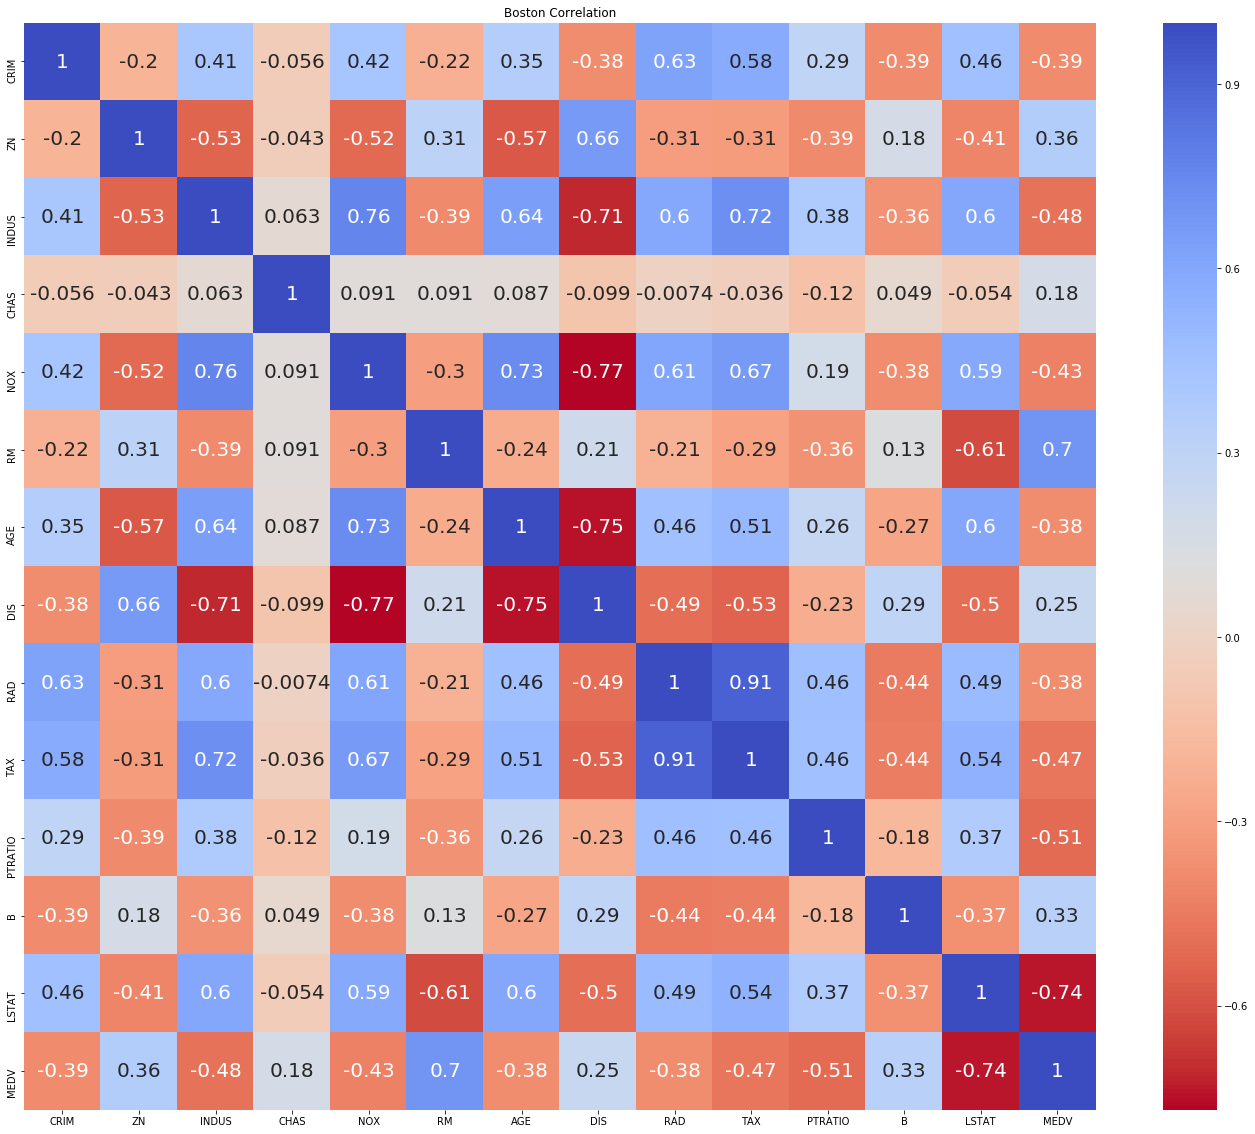

In [7]:
f, (ax1) = plt.subplots(1, 1, figsize=(24, 20))
correlation_matrix = boston.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot = True, annot_kws={'size':20}, ax=ax1)
ax1.set_title('Boston Correlation')

## Analyzing the correlation, we point out that:
### 1. MEDV has a strong positive correlation with RM (0.7)
### 2. MEDV has a strong negative correlation with LSTAT (-0.74)
### 3. RAD and TAX have a correlation of 0.91; this features pair is strongly correlated to each other then we should not select both together for training the model because we could not understand what is the feature that influence more the model

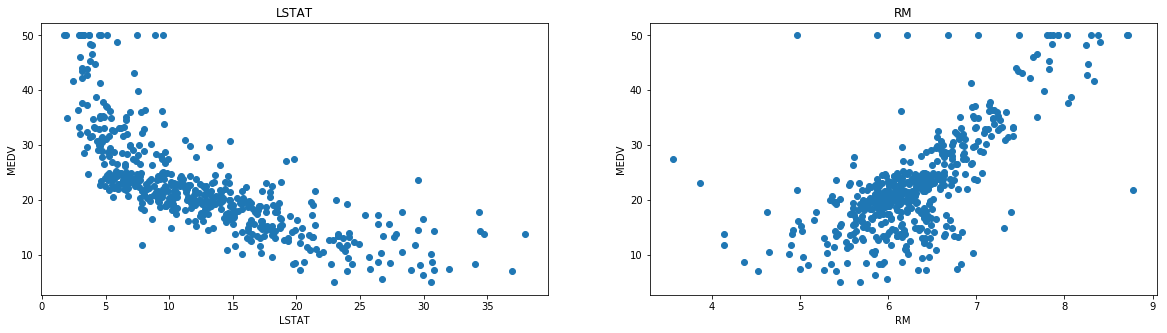

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Linear Regression

In [22]:
VARIABLE = 'LSTAT' #RM
X = pd.DataFrame(np.c_[boston[VARIABLE]], columns = [VARIABLE])
y = boston['MEDV'].values.reshape((y.shape[0], 1))

X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
m = X.shape[0]
n = X.shape[1]
print('Training examples: ', m)
print('Features: ', n)

Training examples:  506
Features:  2


In [23]:
def computeCostVectorized(X, y, theta):
    m=y.size
    h=X.dot(theta)
    J= ((h-y).T).dot(h-y)
    return J/(2*m)

def gradientDescentVectorized(X, y,theta=[[0],[0]],alpha=0.1, n_iter=1500):
    m=y.size
    J = np.zeros((n_iter,1))
    for i in range(n_iter):
        h = X.dot(theta)
        theta = theta - (alpha/m) * np.dot((X.T),(h-y))
        J[i] = computeCostVectorized(X,y,theta)
    return theta, J

In [24]:
num_iters = 60000
alpha = 0.001 #0.1
theta = np.zeros((2, 1))
theta, J_history = gradientDescentVectorized(X,y, theta, alpha, num_iters)
print(theta)

[[34.55382208]
 [-0.95004823]]


### Let's define a function to show when the Gradient Descent has reached convergence (the cost function curve is almost flat, which means the cost value change under a threshold value)

In [25]:
def find_flat(thr = 0.001):
    for i in range(num_iters):
        if abs(J_history[i]-J_history[i-1]) < thr:
            return i
        if i == num_iters-1:
            return 0

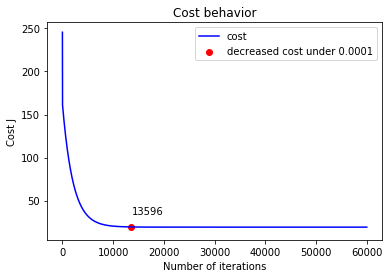

In [26]:
thr = 0.0001
k = find_flat(thr)
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], J_history, '-b', label = 'cost')
plt.scatter(k, J_history[k], c='r', label = 'decreased cost under {}'.format(thr))
plt.text(k, J_history[k]+15, k)
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label
plt.title('Cost behavior')
plt.legend()
plt.show()

### Let's check if we are gone on well with the gradient descent by using the normal equation

In [27]:
def normalEquation(X, y):
    pseudo_inv = np.linalg.pinv(X.T.dot(X))
    product = pseudo_inv.dot(X.T)
    return product.dot(y)
theta_ne = normalEquation(X,y)
print(theta_ne)

[[34.55384088]
 [-0.95004935]]


34.5538408793831
[-0.95004935]


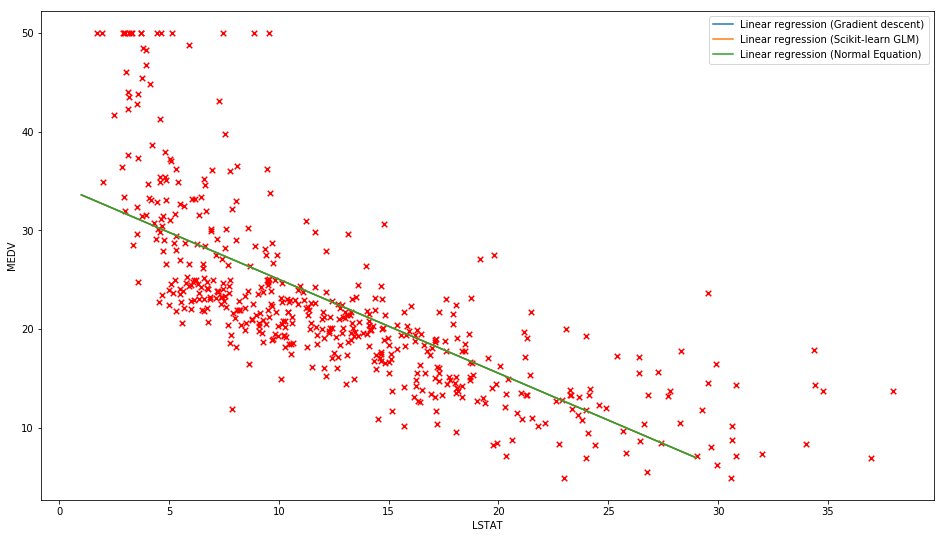

In [28]:
xx = np.arange(1,30)
yy = theta[0] + theta[1] * xx

# Plot gradient descent
plt.figure(figsize=(16,9))
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_ + regr.coef_ * xx, label='Linear regression (Scikit-learn GLM)')

print(regr.intercept_)
print(regr.coef_)

# Compare with Normal Equations
plt.plot(xx, theta_ne[0] + theta_ne[1] * xx, label='Linear regression (Normal Equation)')

#plt.xlim(-2,10)
plt.xlabel(VARIABLE)
plt.ylabel('MEDV')
plt.legend(loc=1)

## This plot shows a model that is not perfectly fitting the data. This problem is caused by some values, called outliers; We need to make a preprocess of the data by removing this values in order to solve this problem.

# Remove Outliers
## An Outlier is a data point that differs significantly from other observations. The outliers cause serious problems in our analysis then we need to reject these values.
## We use the Z-score method, which describes a data point in terms of its relationship to the mean and standard deviation of the dataset; we choose to discard all the data point with a Z-score greater than 2.

Training examples:  405
Features:  2
[[30.86534272]
 [-0.81489421]]


/home/andrea/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/andrea/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


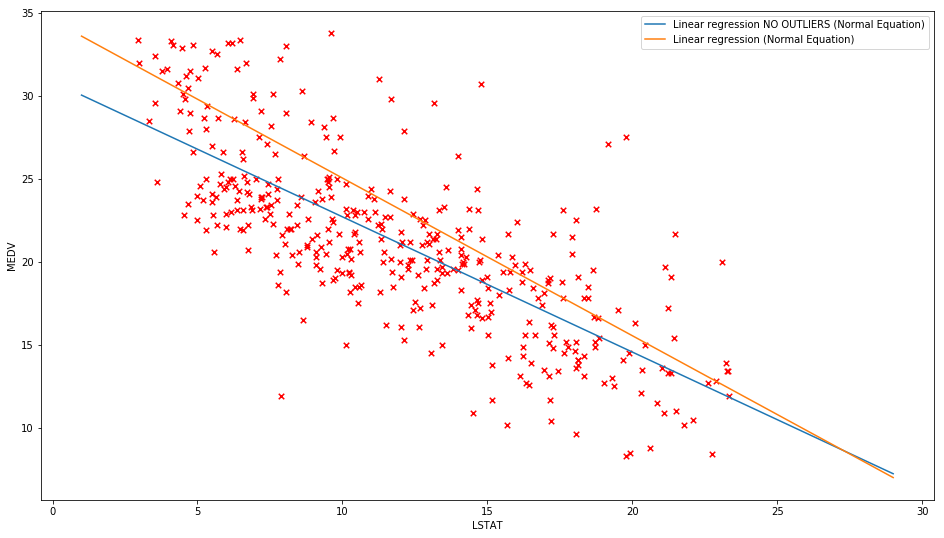

In [36]:
VARIABLE = 'LSTAT' #RM
X_o = pd.DataFrame(np.c_[boston[VARIABLE]], columns = [VARIABLE])
y_o = boston['MEDV'].values.reshape((y.shape[0], 1))

X_o['temp'] = pd.Series(y_o.reshape(y_o.shape[0]), index = X_o.index)
X_o = X_o.mask((X_o - X_o.mean()).abs() > 2 * X_o.std())
X_o = X_o.mask((X_o - X_o.mean()).abs() > 2 * X_o.std()).dropna()
y_o = X_o.as_matrix(columns=X_o.columns[1:])
temp = X_o.as_matrix(columns=X_o.columns[:1])

X_o = np.concatenate([np.ones((temp.shape[0], 1)), temp], axis=1)
m_o = X_o.shape[0]
n_o = X_o.shape[1]
print('Training examples: ', m_o)
print('Features: ', n_o)

theta_ne_o = normalEquation(X_o,y_o)
print(theta_ne_o)

xx = np.arange(1,30)

# Plot gradient descent
plt.figure(figsize=(16,9))
plt.scatter(X_o[:,1], y_o, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, theta_ne_o[0] + theta_ne_o[1] * xx, label='Linear regression NO OUTLIERS (Normal Equation)')
plt.plot(xx, theta_ne[0] + theta_ne[1] * xx, label='Linear regression (Normal Equation)')

#plt.xlim(-2,10)
plt.xlabel(VARIABLE)
plt.ylabel('MEDV')
plt.legend(loc=1)

## The plot shows how the new model (the blue line) fits better than the previous one

## Let's evaluate the behaviour of our model by using the Root Mean Squared Error (RMSE)
$$\large RMSE=\sqrt{\frac{\sum_{i=1}^m(\hat{y_{(i)}} - y_{(i)})}{m}} $$

In [37]:
y_pred = np.zeros((X.shape[0], 1))
y_pred = X.dot(theta)

rmse = np.sqrt(mean_squared_error(y_pred, y))
print('RMSE with outliers: ', rmse)

y_pred_o = np.zeros((X_o.shape[0], 1))
y_pred_o = X_o.dot(theta_ne_o)

rmse = np.sqrt(mean_squared_error(y_pred_o, y_o))
print('RMSE without outliers: ', rmse)

RMSE with outliers:  6.203464131433289
RMSE without outliers:  3.5171166550418955


## The idea, that the blue model is better than the orange, is confirmed by the RMSE metric

# Polynomial Regression
## Sometimes we can study different models by using some techniques:
### 1. To get a feature and create a new one by raising it to power
### 2. To create a new features by multiplying some features
## This approach is used to get a better model!

In [38]:
def polynomial_features(X, degree):
    for i in range(1, degree):
        colname = dataframe.columns[0]+'^'+str(i+1)
        X[colname] = np.power(X[VARIABLE], i+1)
    return X

### Let's take our feature (VARIABLE) and raises it to power and let's define the following models:
Model 1: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(q)$$
Model 2: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(q) + {\theta_2}(q^2)$$
Model 3: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(q) + {\theta_2}(q^2) + {\theta_3}(q^3)$$
Model 4: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(q) + {\theta_2}(q^2) + {\theta_3}(q^3) + {\theta_4}(q^4)$$
Model 5: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(q) + {\theta_2}(q^2) + {\theta_3}(q^3) + {\theta_4}(q^4) + {\theta_5}(q^5)$$
### where q substitute VARIABLE in the models.

In [39]:
dataframe = pd.DataFrame(X[:, 1], columns = [VARIABLE])

X_1 = np.concatenate([np.ones((X.shape[0],1)), polynomial_features(dataframe, 1).values], axis=1)
theta_ne_1 = normalEquation(X_1,y)
print(theta_ne_1)

X_2 = np.concatenate([np.ones((X.shape[0],1)), polynomial_features(dataframe, 2).values], axis=1)
theta_ne_2 = normalEquation(X_2,y)
print(theta_ne_2)

X_3 = np.concatenate([np.ones((X.shape[0],1)), polynomial_features(dataframe, 3).values], axis=1)
theta_ne_3 = normalEquation(X_3,y)
print(theta_ne_3)

X_4 = np.concatenate([np.ones((X.shape[0],1)), polynomial_features(dataframe, 4).values], axis=1)
theta_ne_4 = normalEquation(X_4,y)
print(theta_ne_4)

X_5 = np.concatenate([np.ones((X.shape[0],1)), polynomial_features(dataframe, 5).values], axis=1)
theta_ne_5 = normalEquation(X_5,y)
print(theta_ne_5)

[[34.55384088]
 [-0.95004935]]
[[42.86200733]
 [-2.3328211 ]
 [ 0.04354689]]
[[ 4.86496253e+01]
 [-3.86559278e+00]
 [ 1.48738477e-01]
 [-2.00386767e-03]]
[[ 5.73099582e+01]
 [-7.02846102e+00]
 [ 4.95481226e-01]
 [-1.63101737e-02]
 [ 1.94867818e-04]]
[[ 5.83047794e+00]
 [ 1.37100067e+01]
 [-2.31938916e+00]
 [ 1.51199510e-01]
 [-4.29819581e-03]
 [ 4.43546502e-05]]


# Plot with Normal Equation

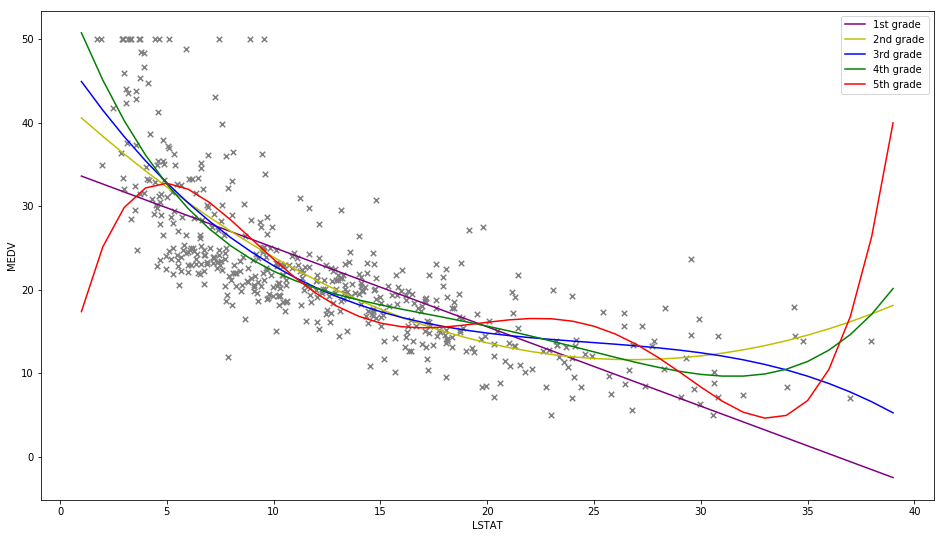

In [40]:
xx = np.arange(1,40)
yy1 = theta_ne_1[0] + theta_ne_1[1] * xx
yy2 = theta_ne_2[0] + theta_ne_2[1] * xx + theta_ne_2[2] * (xx**2)
yy3 = theta_ne_3[0] + theta_ne_3[1] * xx + theta_ne_3[2] * (xx**2) + theta_ne_3[3]*(xx**3)
yy4 = theta_ne_4[0] + theta_ne_4[1] * xx + theta_ne_4[2] * (xx**2) + theta_ne_4[3]*(xx**3) + theta_ne_4[4]*(xx**4)
yy5 = theta_ne_5[0] + theta_ne_5[1] * xx + theta_ne_5[2] * (xx**2) + theta_ne_5[3]*(xx**3) + theta_ne_5[4]*(xx**4) + theta_ne_5[5]*(xx**5) 
# Plot Normal Equation
plt.figure(figsize=(16,9))
plt.scatter(X[:,1], y, s=30, c='grey', marker='x', linewidths=1)
plt.plot(xx,yy1,c='purple', label='1st grade')
plt.plot(xx,yy2,c='y', label='2nd grade')
plt.plot(xx,yy3,c='b', label='3rd grade')
plt.plot(xx,yy4,c='g', label='4th grade')
plt.plot(xx,yy5,c='r', label='5th grade')


plt.xlabel(VARIABLE)
plt.ylabel('MEDV')
plt.legend(loc=1);
plt.show()

# Plot using Gradient Descent
## Let's try to plot the result of the gradient descent in order to compare the two approaches

In [41]:
alpha1 = 0.001
num_iters1 = 60000
theta_1 = np.zeros((2,1))
theta_1, J_history_1 = gradientDescentVectorized(X_1,y, theta_1, alpha1, num_iters1)


alpha2 = 0.000019
num_iters2 = 1000000
theta_2 = np.zeros((3,1))
theta_2, J_history_2 = gradientDescentVectorized(X_2,y, theta_2, alpha2, num_iters2)


alpha3 = 0.000000019
num_iters3 = 5000000
theta_3 = np.zeros((4,1))
theta_3, J_history_3 = gradientDescentVectorized(X_3,y, theta_3, alpha3, num_iters3)
print(theta_3, theta_ne_3)

[[ 7.16395671e-01]
 [ 2.69471781e+00]
 [-1.00187305e-01]
 [ 6.72516345e-04]] [[ 4.86496253e+01]
 [-3.86559278e+00]
 [ 1.48738477e-01]
 [-2.00386767e-03]]


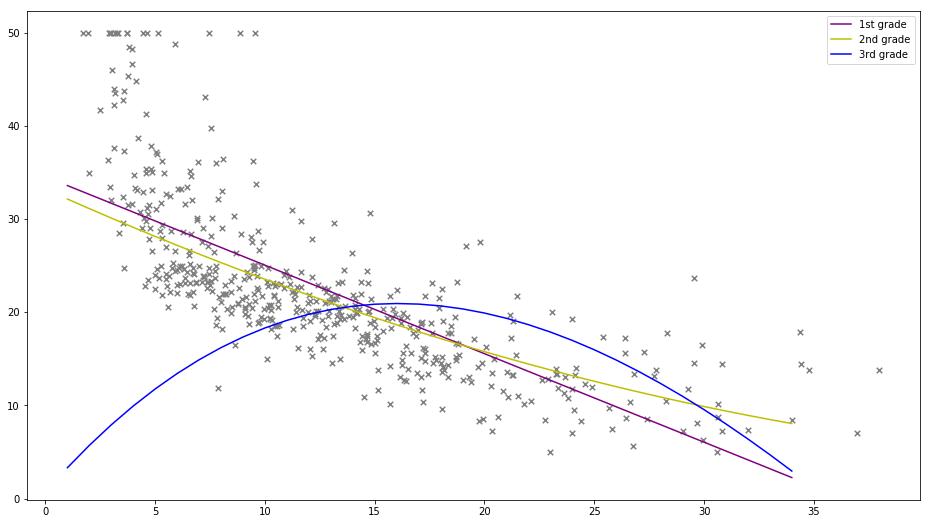

In [42]:
xx = np.arange(1,35)
yy1 = theta_1[0] + theta_1[1] * xx
yy2 = theta_2[0] + theta_2[1] * xx + theta_2[2] * (xx**2)
yy3 = theta_3[0] + theta_3[1] * xx + theta_3[2] * (xx**2) + theta_3[3]*(xx**3)

plt.figure(figsize=(16,9))
plt.scatter(X[:,1], y, s=30, c='grey', marker='x', linewidths=1)
plt.plot(xx,yy1,c='purple', label='1st grade')
plt.plot(xx,yy2,c='y', label='2nd grade')
plt.plot(xx,yy3,c='b',label='3rd grade')

plt.legend(loc=1)
plt.show()

## Observation
## We can see that gradient descent convergence is too slow (we need millions of iterations to reach a discrete result) above all when the polynomial degree becomes greater than 2

# Polynomial regression with LSTAT and RM (3D plot)
## We try to use both LSTAT and RM features in order to show how it is difficult to evaluate the model when the dimension increases (the curse of dimensionality)

In [43]:
X_trid = pd.DataFrame(np.c_[boston['RM'],boston['LSTAT']], columns = ['RM','LSTAT'])
X_trid.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [44]:
y_trid = boston['MEDV'].values.reshape((y.shape[0],1))
X_trid = np.concatenate([np.ones((X_trid.shape[0],1)), X_trid], axis=1)

m_trid = X_trid.shape[0]
n_trid = X_trid.shape[1]

print('#Training examples: ', m_trid)
print('#Features: ',n_trid)

#Training examples:  506
#Features:  3


In [45]:
alpha_trid = 0.001
num_iters_trid = 300000
theta_trid = np.zeros((3,1))
theta_trid, J_history_trid = gradientDescentVectorized(X_trid, y_trid, theta_trid, alpha_trid, num_iters_trid)
print(theta_trid)

[[-1.01575607]
 [ 5.04738744]
 [-0.64572484]]


In [46]:
theta_ne_trid = normalEquation(X_trid,y_trid)
print(theta_ne_trid)

[[-1.35827281]
 [ 5.09478798]
 [-0.64235833]]


In [47]:
dataframe = pd.DataFrame((X_trid[:,1:]), columns = ['RM','LSTAT'])


def polynomial_features(X, degree):
    for i in range(1, degree):
        colname = 'RM_%d'%(i+1)
        colname2 = 'LSTAT_%d'%(i+1)
        X[colname] = X['RM']**(i+1)
        X[colname2] = X['LSTAT']**(i+1)
    return X

dataframe.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [48]:
X_trid1 = np.concatenate([np.ones((X_trid.shape[0],1)), polynomial_features(dataframe, 1).values], axis=1)
theta_ne_trid1 = normalEquation(X_trid1,y_trid)
print(theta_ne_trid1)

X_trid2 = np.concatenate([np.ones((X_trid.shape[0],1)), polynomial_features(dataframe, 2).values], axis=1)
theta_ne_trid2 = normalEquation(X_trid2,y_trid)
print(theta_ne_trid2)

X_trid3 = np.concatenate([np.ones((X_trid.shape[0],1)), polynomial_features(dataframe, 3).values], axis=1)
theta_ne_trid3 = normalEquation(X_trid3,y_trid)
print(theta_ne_trid3)

X_trid4 = np.concatenate([np.ones((X_trid.shape[0],1)), polynomial_features(dataframe, 4).values], axis=1)
theta_ne_trid4 = normalEquation(X_trid4,y_trid)
print(theta_ne_trid4)

[[-1.35827281]
 [ 5.09478798]
 [-0.64235833]]
[[ 1.05084032e+02]
 [-2.60093622e+01]
 [-1.41622862e+00]
 [ 2.35606882e+00]
 [ 2.18496064e-02]]
[[ 1.01800688e+02]
 [-2.28433641e+01]
 [-1.93480744e+00]
 [ 1.81384692e+00]
 [ 5.55531810e-02]
 [ 2.80246479e-02]
 [-6.30200944e-04]]
[[ 2.78159601e+01]
 [ 3.73999759e+01]
 [-3.45122253e+00]
 [-1.48047332e+01]
 [ 2.22683073e-01]
 [ 1.99209718e+00]
 [-7.52358061e-03]
 [-8.44400275e-02]
 [ 9.33456558e-05]]


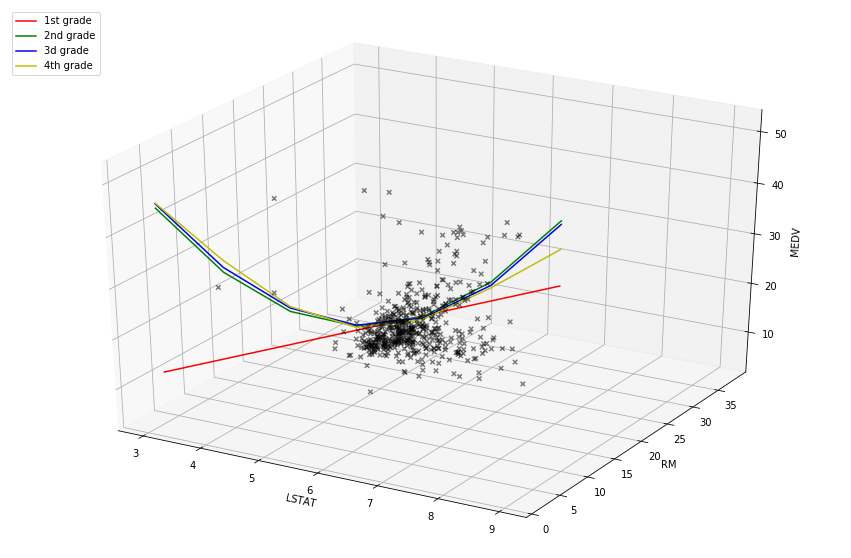

In [49]:
from mpl_toolkits import mplot3d
# Create the figure
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(X_trid[:,1], X_trid[:,2], y, c = 'black', marker='x', alpha=0.5)
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV ')

xx1 = np.arange(3,10)
xx2 = np.arange(3,10)
zz1 = theta_ne_trid1[0] + theta_ne_trid1[1] * xx1 + theta_ne_trid1[2] * xx2
zz2 = theta_ne_trid2[0] + theta_ne_trid2[1] * xx1 + theta_ne_trid2[2] * xx2 + theta_ne_trid2[3] * (xx1**2) +\
        theta_ne_trid2[4]*(xx2**2)
zz3 = theta_ne_trid3[0] + theta_ne_trid3[1] * xx1 + theta_ne_trid3[2] * xx2 + theta_ne_trid3[3] * (xx1**2) +\
        theta_ne_trid3[4]*(xx2**2) + theta_ne_trid3[5]*(xx1**3) + theta_ne_trid3[6]*(xx2**3)
zz4 = theta_ne_trid4[0] + theta_ne_trid4[1] * xx1 + theta_ne_trid4[2] * xx2 + theta_ne_trid4[3] * (xx1**2) +\
        theta_ne_trid4[4]*(xx2**2) + theta_ne_trid4[5]*(xx1**3) + theta_ne_trid4[6]*(xx2**3) +\
        theta_ne_trid4[7] * (xx1**4) + theta_ne_trid4[8]*(xx2**4)


ax.plot(xx1,xx2,zz1, c='r', label='1st grade')
ax.plot(xx1,xx2,zz2,c='g' , label='2nd grade')
ax.plot(xx1,xx2,zz3,c='b',  label='3d grade')
ax.plot(xx1,xx2,zz4, c='y', label='4th grade')
plt.legend(loc=2);

plt.draw()

## Observation
## With this plot we can see that it is already difficult to make evaluation about our models

# Exercise
## The Dataset is divided into Training, Validation and Test

## 1. Let's define the dataframe with the two features and the target variable

In [50]:
dset = pd.DataFrame(np.c_[boston['RM'], boston['LSTAT'], boston['MEDV']], columns = ['RM', 'LSTAT', 'MEDV'])
dset = dset.sample(frac=1).reset_index(drop=True)
rows = dset.shape[0]
dset.head()

,RM,LSTAT,MEDV
0,5.344,23.09,20.0
1,6.302,6.72,24.8
2,6.565,9.51,24.8
3,6.185,18.13,14.1
4,5.961,9.88,21.7


## 2. Let's split the dataset in 3 batches: Training (60%), Validation and Test (20%)

In [51]:
print("Total examples: ", rows)
train_size = round(rows*.6)
print("Training examples: ", train_size)
sec_size = round(rows*.2)
print("Validation/Test examples: ", sec_size)
print('\nSplitting result:')
train = dset.iloc[:train_size]
print("Training: ", train.shape)
valid = dset.iloc[train_size:train_size+sec_size]
print("Validation: ", valid.shape)
test = dset.iloc[train_size+sec_size:]
print("Test: ", test.shape)

Total examples:  506
Training examples:  304
Validation/Test examples:  101

Splitting result:
Training:  (304, 3)
Validation:  (101, 3)
Test:  (101, 3)


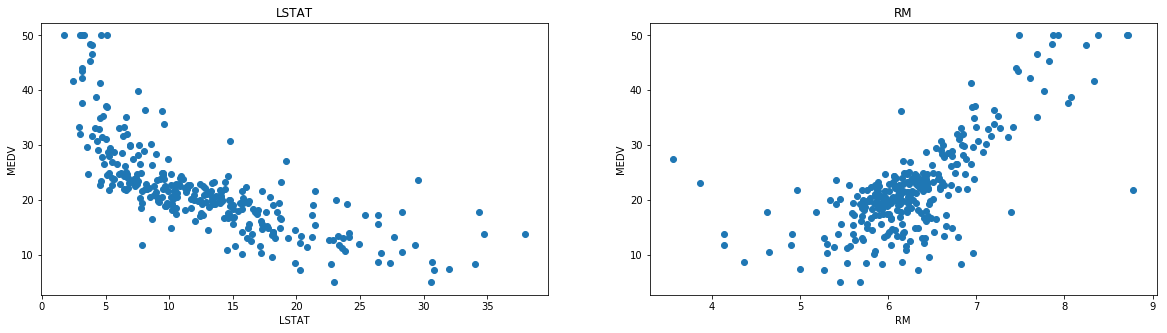

In [52]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = train['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    xxxx = train[col]
    yyyy = target
    plt.scatter(xxxx, yyyy, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [53]:
X = train.loc[:, ['RM', 'LSTAT']]
X_new = pd.DataFrame(np.c_[X['RM']*X['LSTAT']], columns = ['RM*LSTAT'])
y = train.loc[:, ['MEDV']]

print(X.shape)

(304, 2)


## 3. Let's define some models to carry out the training phase
### We define some models by combining and by raising to power some features. This is a good approach if we use features with a meaning to be fused but in this case RM and LSTAT have not.

Modello 1: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(RM*LSTAT)$$
Modello 2: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(RM*LSTAT) + {\theta_2}(RM^2*LSTAT)$$
Modello 3: $$\large h_{\theta}(x) = {\theta_0} + {\theta_1}(RM*LSTAT) + {\theta_2}(RM*LSTAT^2)$$

## 4. Let's apply the normal equation to find the theta parameters of our models

In [54]:
def new_polynomial(X, feat, degree):
    colname = dataframe.columns[0]+'^'+str(degree)
    X[colname] = np.power(X[feat], degree)
    return X[colname]

In [55]:
rm = pd.DataFrame(np.c_[X['RM']], columns = ['RM'])
lstat = pd.DataFrame(np.c_[X['LSTAT']], columns = ['LSTAT'])

X_1 = np.concatenate([np.ones((X.shape[0],1)), X_new.values], axis=1)
theta_ne_1 = normalEquation(X_1,y)
print(theta_ne_1)

X_2 = np.concatenate([np.ones((X.shape[0],1)), X_new.values, np.c_[new_polynomial(rm, 'RM', 2).values*X['LSTAT']]], axis=1)
theta_ne_2 = normalEquation(X_2,y)
print(theta_ne_2)

X_3 = np.concatenate([np.ones((X.shape[0],1)), X_new.values, np.c_[new_polynomial(lstat, 'LSTAT', 2).values*X['RM']]], axis=1)
theta_ne_3 = normalEquation(X_3,y)
print(theta_ne_3)

[[34.72424377]
 [-0.16546041]]
[[ 3.33438816e+01]
 [-3.19328315e-01]
 [ 2.82006249e-02]]
[[ 3.98070998e+01]
 [-2.99299328e-01]
 [ 4.22262190e-03]]


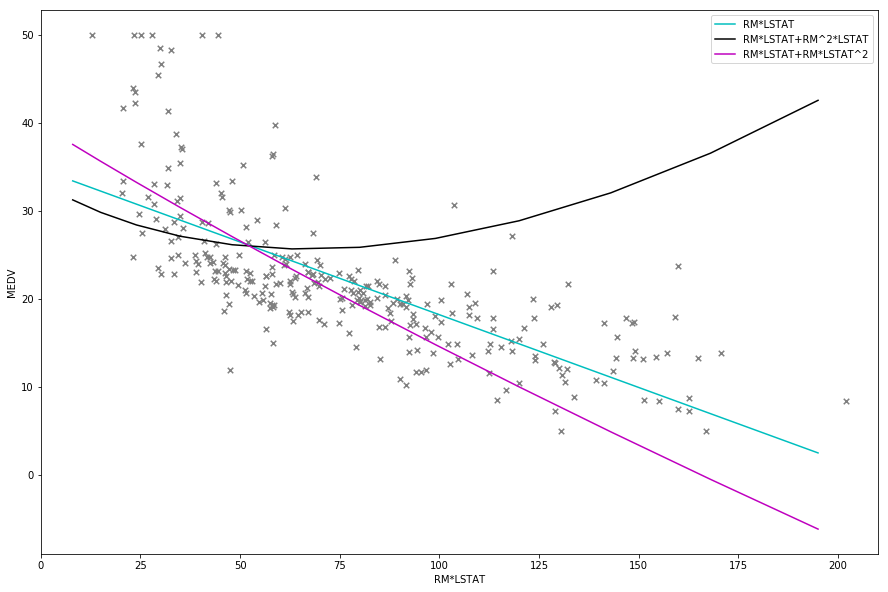

In [56]:
xx1 = np.arange(2,14)
xx2 = np.arange(4,16)
yy1 = theta_ne_1[0] + theta_ne_1[1] * xx1 * xx2
yy2 = theta_ne_2[0] + theta_ne_2[1] * xx1 * xx2 + theta_ne_2[2] * (xx1**2) * xx2
yy3 = theta_ne_3[0] + theta_ne_3[1] * xx1 * xx2 + theta_ne_3[2] * (xx2**2) * xx1

plt.figure(figsize=(15, 10))
plt.scatter(X_1[:,1], y, s=30, c='grey', marker='x', linewidths=1)
plt.plot(xx1 * xx2,yy1,c='c', label='RM*LSTAT')
plt.plot(xx1 * xx2,yy2,c='black', label='RM*LSTAT+RM^2*LSTAT')
plt.plot(xx1 * xx2,yy3,c='m', label='RM*LSTAT+RM*LSTAT^2')

plt.xlabel('RM*LSTAT')
plt.ylabel('MEDV')
plt.xlim(0,210)
plt.legend(loc=0);
plt.show()

## RMSE on training set

In [57]:
X = train.loc[:, ['RM', 'LSTAT']]
X_train = pd.DataFrame(np.c_[X['RM']*X['LSTAT']], columns = ['RM*LSTAT'])
y_train = train.loc[:, ['MEDV']]

rm_train = pd.DataFrame(np.c_[X['RM']], columns = ['RM'])
lstat_train = pd.DataFrame(np.c_[X['LSTAT']], columns = ['LSTAT'])

In [58]:
y_pred = np.zeros((sec_size, 1))
X_train1 = np.concatenate([np.ones((X_train.shape[0],1)), X_train], axis=1)
y_pred = X_train1.dot(theta_ne_1)

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print('RM*LSTAT: ', rmse)

y_pred = np.zeros((sec_size, 1))
X_train2 = np.concatenate([np.ones((X_train.shape[0],1)), X_train, np.c_[new_polynomial(rm_train, 'RM', 2).values*X['LSTAT']]], axis=1)
y_pred = X_train2.dot(theta_ne_2)

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print('RM*LSTAT+RM^2*LSTAT: ', rmse)

y_pred = np.zeros((sec_size, 1))
X_train3 = np.concatenate([np.ones((X_train.shape[0],1)), X_train, np.c_[new_polynomial(lstat_train, 'LSTAT', 2).values*X['RM']]], axis=1)
y_pred = X_train3.dot(theta_ne_3)

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print('RM*LSTAT+RM*LSTAT^2: ', rmse)

RM*LSTAT:  5.827539871205015
RM*LSTAT+RM^2*LSTAT:  5.665232932749886
RM*LSTAT+RM*LSTAT^2:  5.609669764756434


## 5. Validation phase, let's evaluate the RMSE metric for the validation set

In [59]:
X = valid.loc[:, ['RM', 'LSTAT']]
X_valid = pd.DataFrame(np.c_[X['RM']*X['LSTAT']], columns = ['RM*LSTAT'])
y_valid = valid.loc[:, ['MEDV']]

rm_valid = pd.DataFrame(np.c_[X['RM']], columns = ['RM'])
lstat_valid = pd.DataFrame(np.c_[X['LSTAT']], columns = ['LSTAT'])

In [60]:
y_pred = np.zeros((sec_size, 1))
X_valid1 = np.concatenate([np.ones((X_valid.shape[0],1)), X_valid], axis=1)
y_pred = X_valid1.dot(theta_ne_1)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RM*LSTAT: ', rmse)

y_pred = np.zeros((sec_size, 1))
X_valid2 = np.concatenate([np.ones((X_valid.shape[0],1)), X_valid, np.c_[new_polynomial(rm_valid, 'RM', 2).values*X['LSTAT']]], axis=1)
y_pred = X_valid2.dot(theta_ne_2)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RM*LSTAT+RM^2*LSTAT: ', rmse)

y_pred = np.zeros((sec_size, 1))
X_valid3 = np.concatenate([np.ones((X_valid.shape[0],1)), X_valid, np.c_[new_polynomial(lstat_valid, 'LSTAT', 2).values*X['RM']]], axis=1)
y_pred = X_valid3.dot(theta_ne_3)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('RM*LSTAT+RM*LSTAT^2: ', rmse)

RM*LSTAT:  7.180927065920508
RM*LSTAT+RM^2*LSTAT:  6.948146433593475
RM*LSTAT+RM*LSTAT^2:  6.939091354892269


## 6. Testing phase

In [61]:
X = test.loc[:, ['RM', 'LSTAT']]
X_test = pd.DataFrame(np.c_[X['RM']*X['LSTAT']], columns = ['RM*LSTAT'])
y_test = test.loc[:, ['MEDV']]

rm_test = pd.DataFrame(np.c_[X['RM']], columns = ['RM'])
lstat_test = pd.DataFrame(np.c_[X['LSTAT']], columns = ['LSTAT'])

In [62]:
y_pred = np.zeros((sec_size, 1))
X_test1 = np.concatenate([np.ones((X_test.shape[0],1)), X_test], axis=1)
y_pred = X_test1.dot(theta_ne_1)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RM*LSTAT: ', rmse)

y_pred = np.zeros((sec_size, 1))
X_test2 = np.concatenate([np.ones((X_test.shape[0],1)), X_test, np.c_[new_polynomial(rm_test, 'RM', 2).values*X['LSTAT']]], axis=1)
y_pred = X_test2.dot(theta_ne_2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RM*LSTAT+RM^2*LSTAT: ', rmse)

y_pred = np.zeros((sec_size, 1))
X_test3 = np.concatenate([np.ones((X_test.shape[0],1)), X_test, np.c_[new_polynomial(lstat_test, 'LSTAT', 2).values*X['RM']]], axis=1)
y_pred = X_test3.dot(theta_ne_3)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RM*LSTAT+RM*LSTAT^2: ', rmse)

RM*LSTAT:  6.758619856001923
RM*LSTAT+RM^2*LSTAT:  6.5088802488127895
RM*LSTAT+RM*LSTAT^2:  6.655358551807103


## Observation
### This approach can be used to find a model that fits well the data but actually this has no physical sense because the two features are meaningless when they are mixed. 